<a href="https://colab.research.google.com/github/zaibjahan200/Machine-Learning/blob/master/Heart_Attack_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Preparation

This Dataset is the real-world data from [UCI Archive Heart Disease Dataset](https://archive.ics.uci.edu/dataset/45/heart+disease). This dataset had 76 attributes from which a subset of 14 attributes was used in the research paper.

In [20]:
!pip install ucimlrepo

In [21]:
from ucimlrepo import fetch_ucirepo
import pandas as pd

# fetch dataset
heart_disease = fetch_ucirepo(id=45)

# # data (as pandas dataframes)
X = heart_disease.data.features
y = heart_disease.data.targets

# metadata
# print(heart_disease.metadata)
#

# variable information
print(heart_disease.variables)


        name     role         type demographic  \
0        age  Feature      Integer         Age   
1        sex  Feature  Categorical         Sex   
2         cp  Feature  Categorical        None   
3   trestbps  Feature      Integer        None   
4       chol  Feature      Integer        None   
5        fbs  Feature  Categorical        None   
6    restecg  Feature  Categorical        None   
7    thalach  Feature      Integer        None   
8      exang  Feature  Categorical        None   
9    oldpeak  Feature      Integer        None   
10     slope  Feature  Categorical        None   
11        ca  Feature      Integer        None   
12      thal  Feature  Categorical        None   
13       num   Target      Integer        None   

                                          description  units missing_values  
0                                                None  years             no  
1                                                None   None             no  
2              

In [22]:
cat = ['sex','cp','restecg','fbs','exang','slope','ca','thal']
num = ['age','trestbps','chol','thalach','oldpeak']

Details of the Dataset:
 - Age : Age of the person.
 - Sex : Gender
 - cp : chest pain type
    - Value 1: typical angina
    - Value 2: atypical angina
    - Value 3: non-anginal pain
    - Value 4: asymptomatic

 - trestbps : Resting Heart Rate (At admission to the hospital)
 - chol : Cholestrol Level
 - fbs : Fasting Blood Sugar Level > 120 mg/dl  (1 = true; 0 = false)

 (Fasting : Blood taken after 8 hours of taking meal)

 - restecg: resting electrocardiographic results
    - Value 0: normal
    - Value 1: having ST-T wave abnormality (T wave inversions and/or ST )
    - Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria.
 - thalach: maximum heart rate achieved
 - exang: exercise induced angina (1 = yes; 0 = no)
 - oldpeak = ST depression induced by exercise relative to rest

 - slope: the slope of the peak exercise ST segment
    - Value 1: upsloping
    - Value 2: flat
    - Value 3: downsloping

 - ca: number of major vessels (0-3) colored by flourosopy
 - thal: 3 = normal; 6 = fixed defect; 7 = reversable defect
 - num: diagnosis of heart disease (angiographic disease status)
    - Value 0: < 50% diameter narrowing
    - Value 1: > 50% diameter narrowing



# Data Preprocessing and Cleaning

In [23]:
data = pd.concat([X,y],axis=1)
data.isnull().sum()

,0
age,0
sex,0
cp,0
trestbps,0
chol,0
fbs,0
restecg,0
thalach,0
exang,0
oldpeak,0


In [24]:
data[data['thal'].isnull() == True]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
87,53,0,3,128,216,0,2,115,0,0.0,1,0.0,NaN,0
266,52,1,4,128,204,1,0,156,1,1.0,2,0.0,NaN,2


In [25]:
data[data['ca'].isnull() == True]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
166,52,1,3,138,223,0,0,169,0,0.0,1,NaN,3.0,0
192,43,1,4,132,247,1,2,143,1,0.1,2,NaN,7.0,1
287,58,1,2,125,220,0,0,144,0,0.4,2,NaN,7.0,0
302,38,1,3,138,175,0,0,173,0,0.0,1,NaN,3.0,0


In [26]:
corr = data.corr()
corr['num'].sort_values(ascending=False)

,num
num,1.000000
ca,0.518909
thal,0.509923
oldpeak,0.504092
cp,0.407075
exang,0.397057
slope,0.377957
sex,0.224469
age,0.222853
restecg,0.183696


In [27]:
data = data.fillna(data['ca'].median())
data['thal'].dropna(inplace=True,axis=0)

In [28]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    float64
 12  thal      303 non-null    float64
 13  num       303 non-null    int64  
dtypes: float64(3), int64(11)
memory usage: 33.3 KB


In [29]:
data.isnull().sum()

,0
age,0
sex,0
cp,0
trestbps,0
chol,0
fbs,0
restecg,0
thalach,0
exang,0
oldpeak,0


# Data Preprocessing

In [30]:
data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.438944,0.679868,3.158416,131.689769,246.693069,0.148515,0.990099,149.607261,0.326733,1.039604,1.600660,0.663366,4.702970,0.937294
std,9.038662,0.467299,0.960126,17.599748,51.776918,0.356198,0.994971,22.875003,0.469794,1.161075,0.616226,0.934375,1.971038,1.228536
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,3.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000
50%,56.000000,1.000000,3.000000,130.000000,241.000000,0.000000,1.000000,153.000000,0.000000,0.800000,2.000000,0.000000,3.000000,0.000000
75%,61.000000,1.000000,4.000000,140.000000,275.000000,0.000000,2.000000,166.000000,1.000000,1.600000,2.000000,1.000000,7.000000,2.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,3.000000,7.000000,4.000000


In [31]:
for i in cat:
  print('Unqiue value of ',i ,': ',data[i].unique())

Unqiue value of  sex :  [1 0]
Unqiue value of  cp :  [1 4 3 2]
Unqiue value of  restecg :  [2 0 1]
Unqiue value of  fbs :  [1 0]
Unqiue value of  exang :  [0 1]
Unqiue value of  slope :  [3 2 1]
Unqiue value of  ca :  [0. 3. 2. 1.]
Unqiue value of  thal :  [6. 3. 7. 0.]


In [32]:
data = data[data['thal'] != 0]


In [33]:
data['num'].value_counts()

,count
num,
0,163
1,55
2,35
3,35
4,13


## Visualization for bias Check

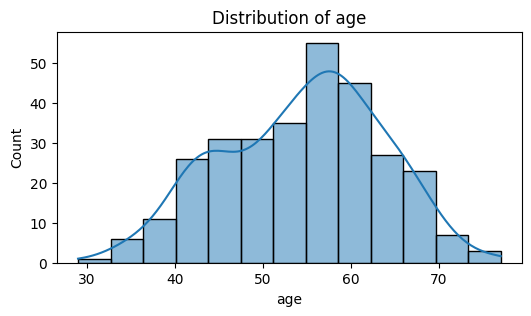

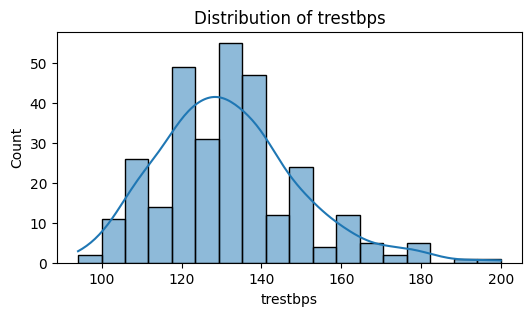

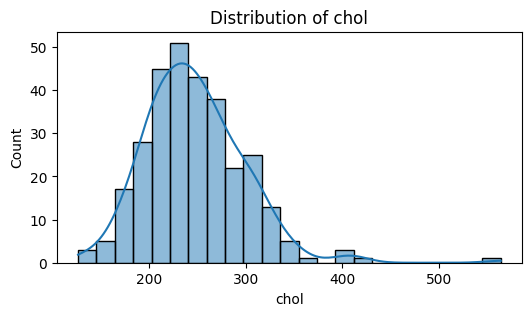

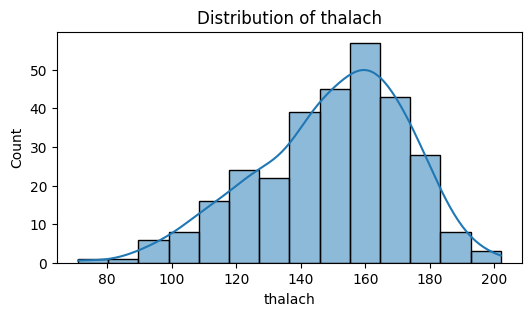

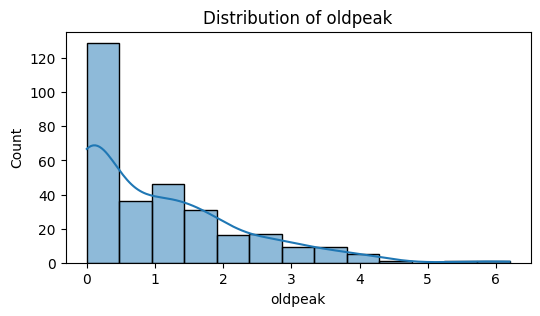

In [34]:
import seaborn as sns
import matplotlib.pyplot as plt

for col in num:
    plt.figure(figsize=(6,3))
    sns.histplot(data[col], kde=True)
    plt.title(f'Distribution of {col}')
    plt.show()

## Biasness in Numerical Data
1. Age

    Observation: Slightly left-skewed, most counts between 50–60.

    Interpretation:

    - Most patients in this dataset are middle-aged.

    - Slight skew → fewer younger or older patients.

    - Bias: Mild age bias toward 50–60. Models might learn patterns more strongly for this age group.

2. Trestbps (Resting Blood Pressure)

    Observation: Right-skewed with 2–3 peaks.

    Interpretation:

    - Peaks indicate subgroups (e.g., normal BP, pre-hypertensive, hypertensive).

    - Right skew → some patients have very high blood pressure.

    - Bias: Data more concentrated in lower-middle range, very high BP is rare. Model might under-represent extreme BP cases.
  
3. Chol (Cholesterol)

    Observation: Most values 200–300, becomes almost flat past 300.

    Interpretation:

    - Most patients have moderate cholesterol.

    - Very high cholesterol values are rare → long tail.

    - Skew is less clear because distribution flattens at high values.

    - Bias: Dataset is biased toward moderate cholesterol, extreme values underrepresented.

4. Thalach (Maximum Heart Rate Achieved)

    Observation: Left-skewed → most values are high, fewer low values.

    Interpretation:

    - Most patients achieved a relatively high maximum heart rate during the test.

    - Few patients had low heart rates → underrepresented in dataset.

    - Bias: Model may learn more from higher thalach values and underperform for patients with low max heart rate.



5. Oldpeak (ST Depression Induced by Exercise Relative to Rest)

    Observation: Continuous values ranging roughly 0 → 5–7.

    Interpretation:

    - Most patients cluster near 0 (no ST depression).

    - Fewer patients have high oldpeak (4–7).


    - Bias: Dataset is concentrated at low oldpeak values, so the model sees more examples of normal/minimal ST depression.

Extreme ST depression cases are underrepresented, which may slightly bias predictions for severe cases.

## How to tackle biasness/skewness?
For right-skewed numeric features (trestbps, chol):

- Apply log, sqrt, or Box-Cox transformation before scaling.

For left-skewed numeric features (thalach):

- Reflect and then log-transform if needed.

This reduces the effect of extreme tails on the model.


---
###Slight skew

Minor skew usually doesn’t strongly affect most models, especially:

- Tree-based models: Random Forest, Decision Tree, Gradient Boosted Trees → unaffected by skew.

- Robust models like KNN or SVM can tolerate slight skew if the range isn’t huge.

Scaling alone (StandardScaler or MinMaxScaler) is usually enough to normalize ranges.


But here we will first try to train our model without any strategies to tackle biasness

## Biasness in Catagorical Data

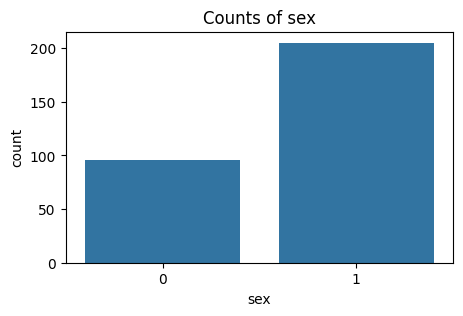

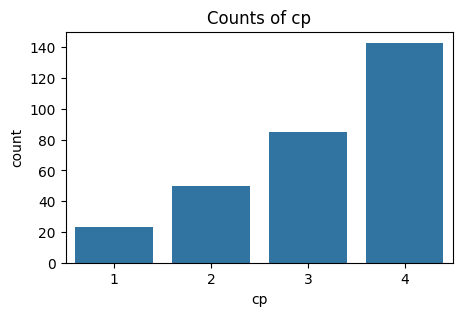

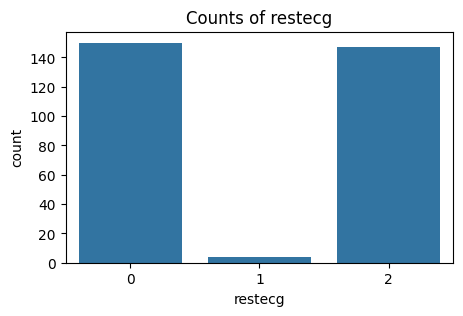

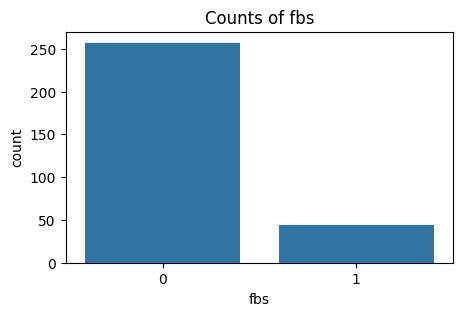

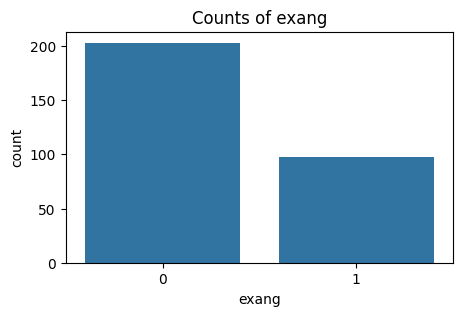

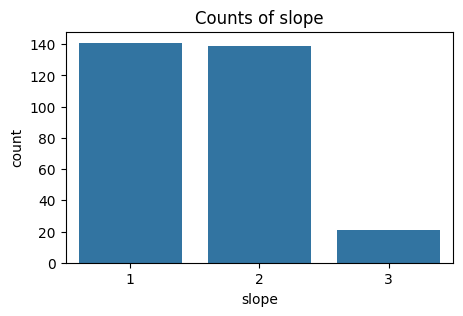

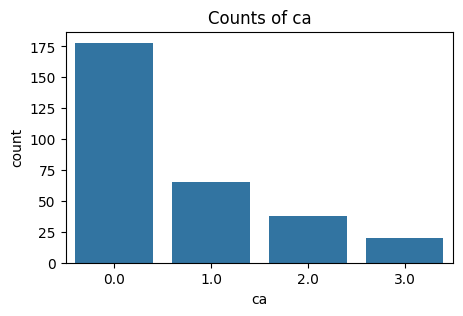

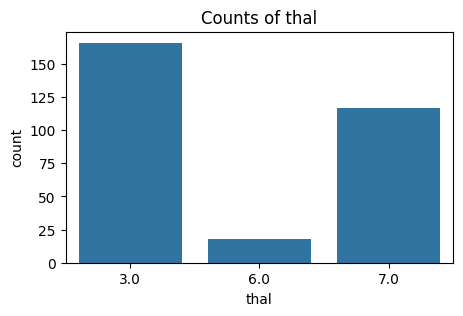

In [35]:
for col in cat:
    plt.figure(figsize=(5,3))
    sns.countplot(x=data[col])
    plt.title(f'Counts of {col}')
    plt.show()


Catagorical data has a lot of bias and some values are underrepresented so:

Practical Ways to Handle Categorical Bias

Oversampling / Undersampling

- SMOTE or RandomOverSampler for minority categories.

Class weighting

- Many classifiers allow weights per class (class_weight='balanced').

Feature aggregation (optional)

- Merge very rare categories into “Other” to reduce sparsity.

Stratified splitting

- Ensure train/test split preserves category distribution.

##Heatmap

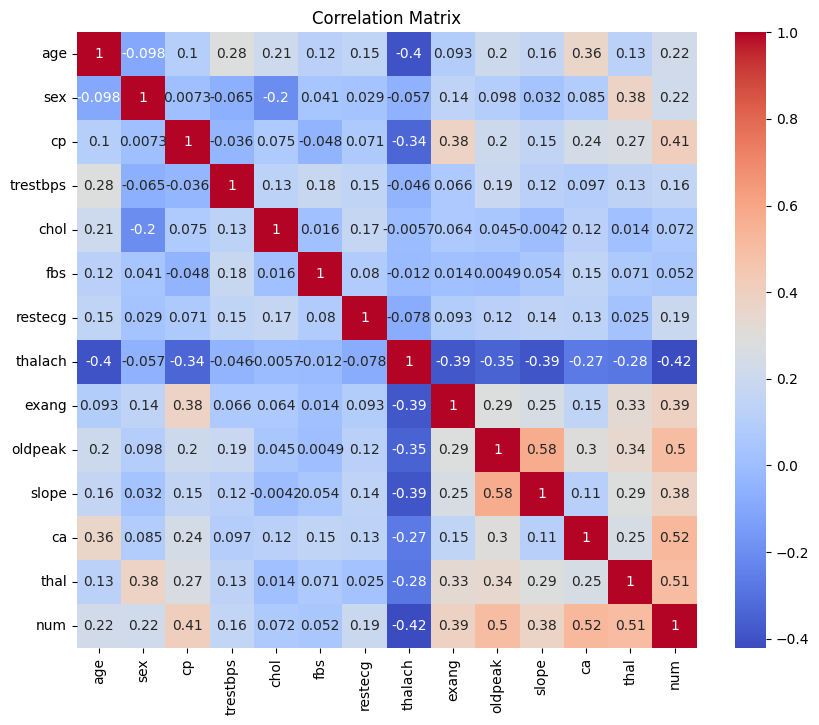

In [36]:
corr = data.corr()
plt.figure(figsize=(10,8))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()


In [38]:
for col in cat:
    print(pd.crosstab(data[col], data['num_binary'], normalize='index')*100)


num_binary          0          1
sex                             
0           73.958333  26.041667
1           44.878049  55.121951
num_binary          0          1
cp                              
1           69.565217  30.434783
2           82.000000  18.000000
3           78.823529  21.176471
4           27.272727  72.727273
num_binary          0          1
restecg                         
0           63.333333  36.666667
1           25.000000  75.000000
2           45.578231  54.421769
num_binary          0          1
fbs                             
0           54.474708  45.525292
1           52.272727  47.727273
num_binary          0          1
exang                           
0           68.965517  31.034483
1           23.469388  76.530612
num_binary          0          1
slope                           
1           74.468085  25.531915
2           35.251799  64.748201
3           42.857143  57.142857
num_binary          0          1
ca                              
0.0       

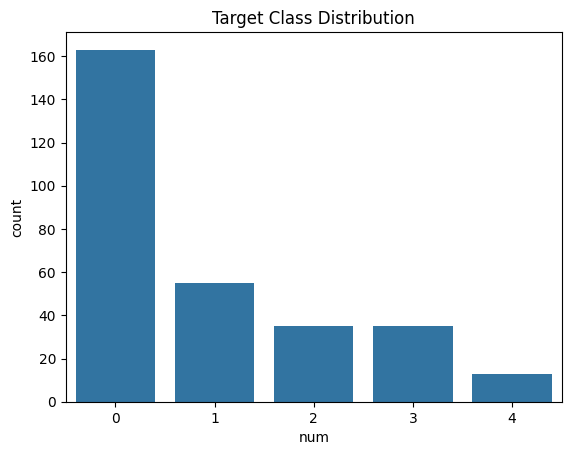

In [39]:
sns.countplot(x='num', data=data)
plt.title("Target Class Distribution")
plt.show()


In the dataset explanation, the goal category has been concentrated on simply attempting to distinguish presence (values 1,2,3,4) from absence (value 0).
So i will convert multivariable into binary target

In [40]:
data['num_binary'] = data['num'].apply(lambda x: 0 if x==0 else 1)


# Model Training

In [77]:
from sklearn.model_selection import train_test_split

X = data.drop(['num','num_binary'], axis=1)
y = data['num_binary']  # or data['num'] for multi-class

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.4, stratify=y, random_state=42
)


## XGBoost and Stratified K-fold

In [78]:
import xgboost as xgb
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.metrics import make_scorer, f1_score, accuracy_score

#1. Initialize XGBoost classifier
scale_pos_weight = sum(y==0)/sum(y==1)

model = xgb.XGBClassifier(
    n_estimators=25,
    max_depth=4,
    learning_rate=0.05,
    scale_pos_weight=scale_pos_weight,
    eval_metric='logloss',
    random_state=42
)

# 2. Stratified K-Fold CV
skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

# 3. Cross-validation for accuracy
acc_scores = cross_val_score(model, X, y, cv=skf, scoring='accuracy')
print("Accuracy scores for each fold:", acc_scores)
print("Mean Accuracy:", acc_scores.mean())
print("Std Dev Accuracy:", acc_scores.std())

# 4. Cross-validation for F1-score
f1_scorer = make_scorer(f1_score)
f1_scores = cross_val_score(model, X, y, cv=skf, scoring=f1_scorer)
print("F1 scores for each fold:", f1_scores)
print("Mean F1-score:", f1_scores.mean())
print("Std Dev F1-score:", f1_scores.std())
model.fit(X_train,y_train)

Accuracy scores for each fold: [0.83870968 0.93333333 0.8        0.76666667 0.8        0.76666667
 0.83333333 0.66666667 0.9        0.83333333]
Mean Accuracy: 0.8138709677419357
Std Dev Accuracy: 0.0704090915045297
F1 scores for each fold: [0.83870968 0.92307692 0.8        0.77419355 0.75       0.66666667
 0.8        0.61538462 0.88       0.81481481]
Mean F1-score: 0.7862846245749471
Std Dev F1-score: 0.0874135702204197


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, feature_weights=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.05, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=4, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=25, n_jobs=None,
              num_parallel_tree=None, ...)

In [79]:
from sklearn.metrics import accuracy_score, classification_report
y_pred = model.predict(X_test)
print("Test Accuracy: ",accuracy_score(y_test,y_pred))
print("Train Accuracy: ",accuracy_score(y_train,model.predict(X_train)))

Test Accuracy:  0.8181818181818182
Train Accuracy:  0.9333333333333333


In [80]:
print('Classification Report: ',classification_report(y_test,y_pred))

Classification Report:                precision    recall  f1-score   support

           0       0.79      0.91      0.85        66
           1       0.87      0.71      0.78        55

    accuracy                           0.82       121
   macro avg       0.83      0.81      0.81       121
weighted avg       0.82      0.82      0.82       121



In [81]:
data['num_binary'].value_counts()

,count
num_binary,
0,163
1,138


## Decision Tree

In [106]:
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier(criterion='entropy',random_state=42,min_samples_split = 16,min_samples_leaf=8)
tree.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', min_samples_leaf=8,
                       min_samples_split=16, random_state=42)

In [107]:
from sklearn.metrics import accuracy_score, classification_report
y_pred = tree.predict(X_test)
print("Test Accuracy: ",accuracy_score(y_test,y_pred))
print("Train Accuracy: ",accuracy_score(y_train,tree.predict(X_train)))

Test Accuracy:  0.8264462809917356
Train Accuracy:  0.8555555555555555


In [108]:
print('Classification Report: ',classification_report(y_test,y_pred))

Classification Report:                precision    recall  f1-score   support

           0       0.82      0.88      0.85        66
           1       0.84      0.76      0.80        55

    accuracy                           0.83       121
   macro avg       0.83      0.82      0.82       121
weighted avg       0.83      0.83      0.83       121



## Naive Bayes and KNN

In [110]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)

print("KNN Accuracy:", accuracy_score(y_test, y_pred_knn))
print("KNN Classification Report:", classification_report(y_test, y_pred_knn))


KNN Accuracy: 0.6446280991735537
KNN Classification Report:               precision    recall  f1-score   support

           0       0.65      0.74      0.70        66
           1       0.63      0.53      0.57        55

    accuracy                           0.64       121
   macro avg       0.64      0.63      0.63       121
weighted avg       0.64      0.64      0.64       121



In [111]:
# Naive Bayes
nb = GaussianNB()
nb.fit(X_train, y_train)
y_pred_nb = nb.predict(X_test)

print("Naive Bayes Accuracy:", accuracy_score(y_test, y_pred_nb))
print("Naive Bayes Precision:", classification_report(y_test, y_pred_nb))

Naive Bayes Accuracy: 0.8842975206611571
Naive Bayes Precision:               precision    recall  f1-score   support

           0       0.89      0.89      0.89        66
           1       0.87      0.87      0.87        55

    accuracy                           0.88       121
   macro avg       0.88      0.88      0.88       121
weighted avg       0.88      0.88      0.88       121

